In [1]:
from sklearn.linear_model import LinearRegression
from dfsmc.projection.projection_model import TrivialProjector, RegressionProjector
from dfsmc.projection.projection_data import PLAYER_ID_COLUMNS, TEAM_ID_COLUMNS, FANTASY_COLUMNS, SCORING_COLUMNS, PLAYER_STAT_COLUMNS, TEAM_STAT_COLUMNS

import pandas as pd
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
 
trivial = TrivialProjector()
linear = RegressionProjector(LinearRegression())

[19.20424808 19.59032297 20.03566963 ... 15.55484031 14.9692831
 15.40976292]
                                                     draftkings_points  draftkings_points_actual
year name_display  week_num team_name_abbr pos_game                                             
2017 Aaron Rodgers 2        GNB            QB                19.204248                      23.5
                   3        GNB            QB                19.590323                      28.8
                   4        GNB            QB                20.035670                      23.1
                   5        GNB            QB                19.841930                      24.0
                   15       GNB            QB                19.785363                      24.9
...                                                                ...                       ...
2022 Zach Wilson   8        NYJ            QB                15.096297                      22.4
                   9        NYJ            QB    

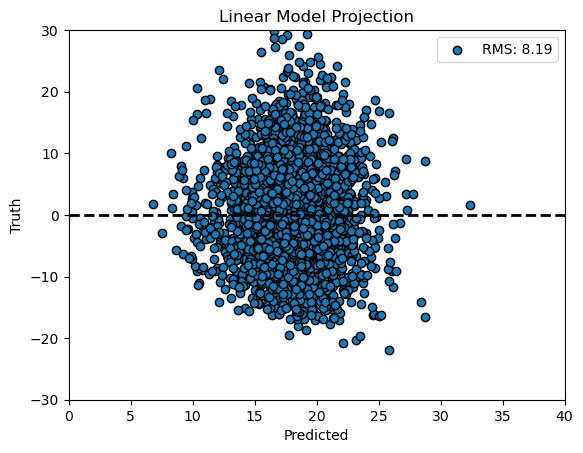

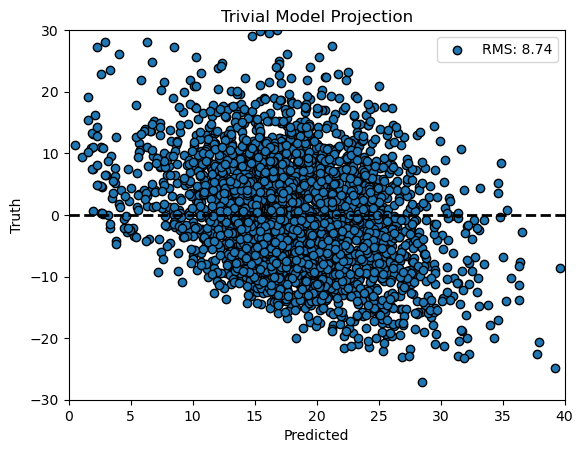

In [2]:
def plot_results(y_pred, y_true, title):
    plt.figure()
    res_rms = ((y_pred - y_true)**2).mean()**0.5
    plt.scatter(y_pred, y_true - y_pred, edgecolors='k', label=f'RMS: {res_rms:.2f}')
    plt.plot([0, 40], [0, 0], '--', color='black', lw=2)
    plt.xlim([0, 40])
    plt.ylim([-30, 30])
    plt.legend()
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.title(title)
    
print(linear.y_pred)
print(linear.test_examples)
print(trivial.test_examples)
plot_results(linear.y_pred, linear.y_truth, 'Linear Model Projection')
print(trivial.test_examples.columns)
trivial_data = trivial.test_examples.reset_index().copy()
trivial_qbs = trivial_data.loc[trivial_data['pos_game'] == 'QB']
plot_results(trivial_qbs.dropna()['draftkings_points'].values, trivial_qbs.dropna()['draftkings_points_actual'].values, 'Trivial Model Projection')


plt.show()
